In [ ]:
"""LGBM & XGBM"""

In [ ]:
### Exploratory Data Analysis (EDA)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Summary Statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN        

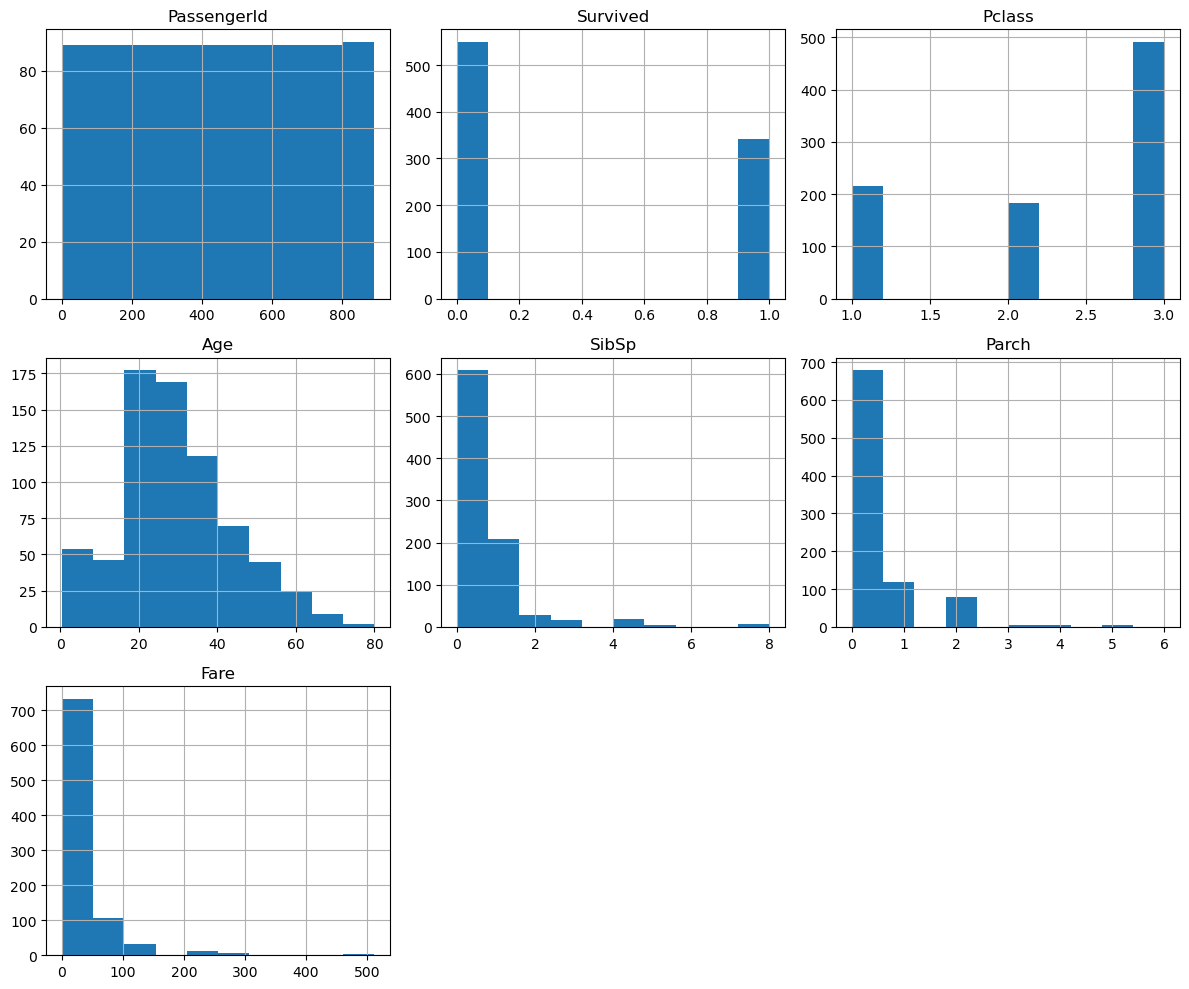

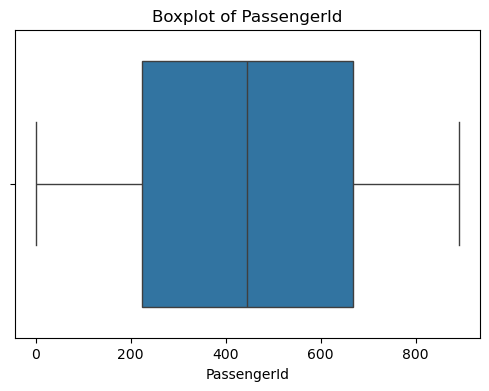

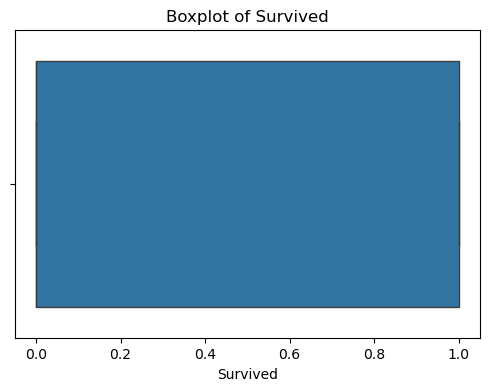

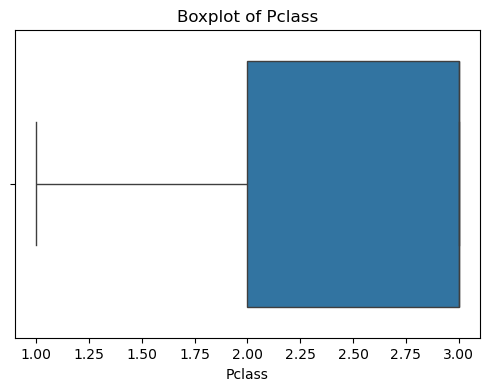

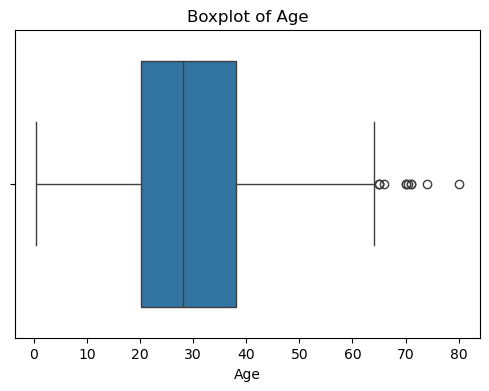

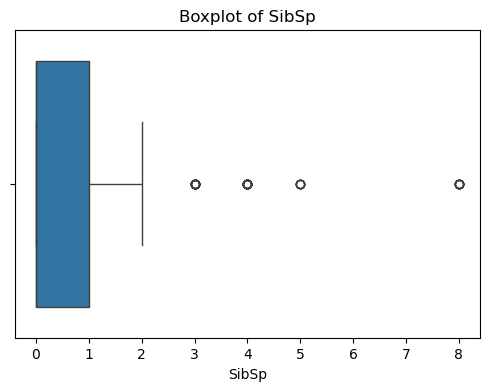

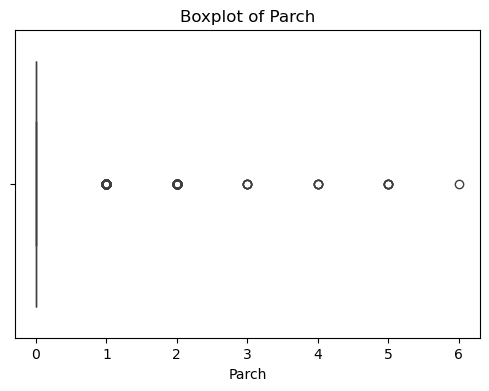

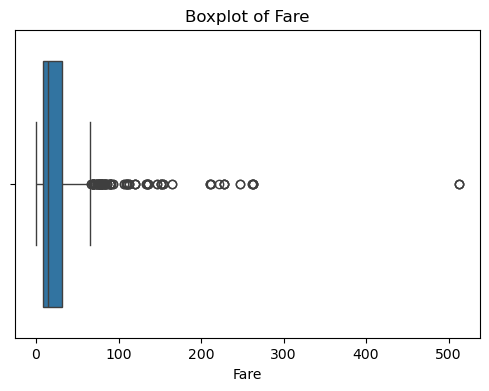

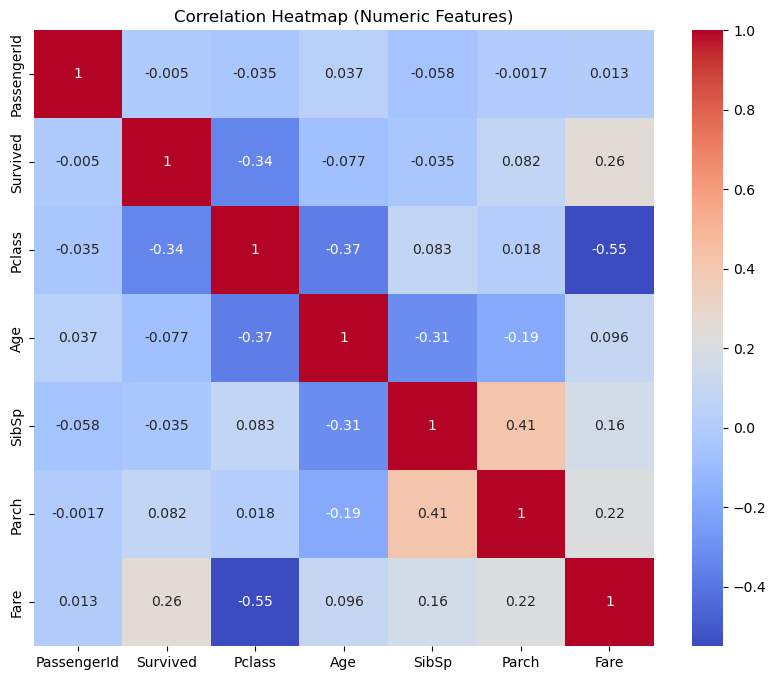

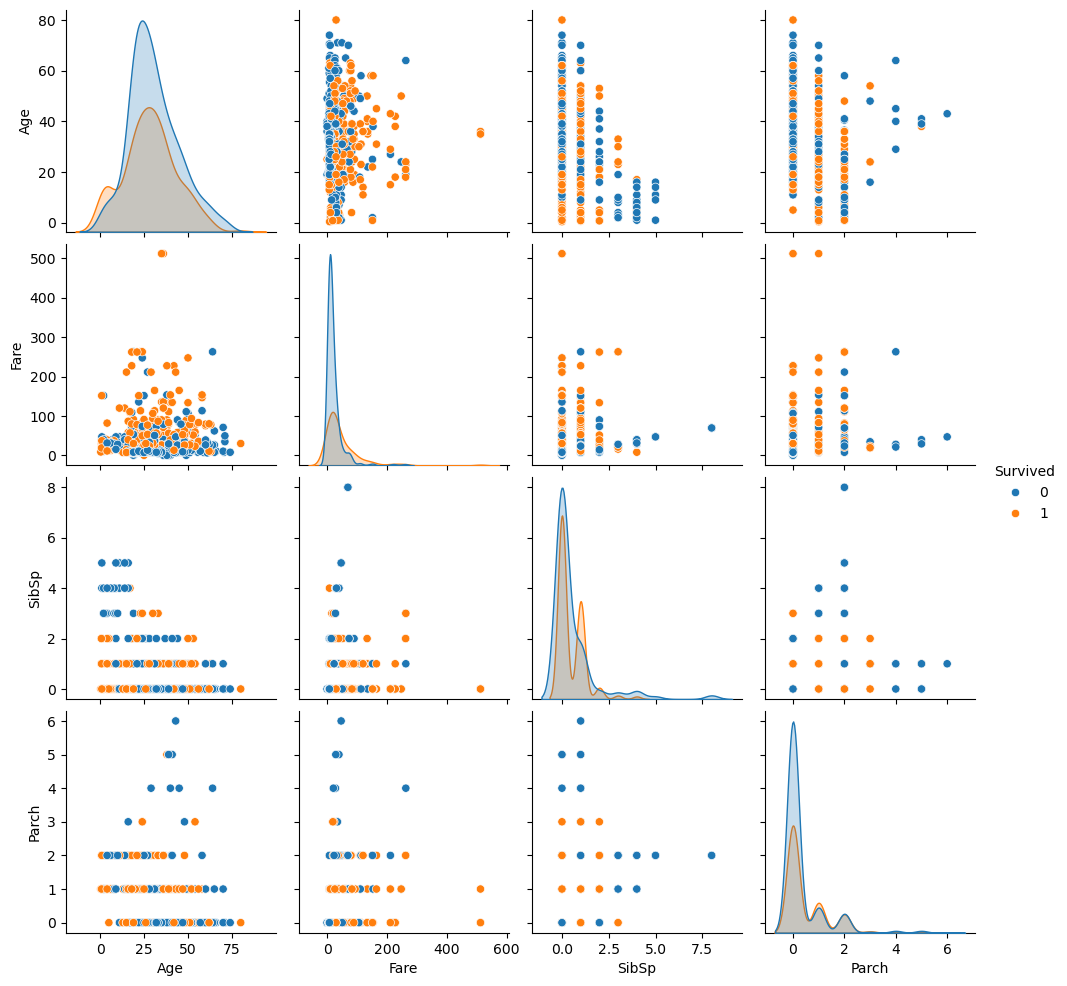

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('logistic training.csv')

# Basic information
print("Basic Info:")
print(df.info())

# Summary statistics
print("Summary Statistics:")
print(df.describe(include='all'))

# Missing values
print("Missing Values:")
print(df.isnull().sum())

# Data types
print("Data Types:")
print(df.dtypes)

# Histograms
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Boxplots for numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


import seaborn as sns

numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']
sns.pairplot(df[numerical_columns + ['Survived']], hue='Survived')



In [ ]:
""" Data Distribution Insights
Age: Mostly between 20–40 years; a few outliers above 60.

Fare: Right-skewed — most fares are low, with a few very high values.

Pclass: More passengers in 3rd class than in 1st or 2nd.

 Relationships with Survival
Sex: Survival rate was higher for females than males.

Class (Pclass): 1st class passengers had better survival rates than 3rd class.

Age vs Fare: Survivors were spread across age groups, but higher fares generally corresponded to higher survival chances.

"""


In [ ]:
### Data Preprocessing

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables
label_enc = LabelEncoder()
for col in ['Sex', 'Embarked']:
    df[col] = df[col].astype(str)  
    df[col] = label_enc.fit_transform(df[col])

# Fill missing Age with median 
df['Age'] = df['Age'].fillna(df['Age'].median())
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('logistic training.csv')

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill missing Cabin with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')

#  extract the first letter of Cabin
df['Cabin'] = df['Cabin'].astype(str).str[0]

# Convert PassengerId to string to prevent misleading analysis
df['PassengerId'] = df['PassengerId'].astype(str)

# 0 set as index
df.set_index('PassengerId', inplace=True)


# Encode categorical variables including updated Cabin
label_enc = LabelEncoder()
for col in ['Sex', 'Embarked', 'Cabin']:
    df[col] = df[col].astype(str)
    df[col] = label_enc.fit_transform(df[col])

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,8,2
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,1,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,8,2


In [7]:
# Missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [ ]:
### Building Predictive Models

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder



# Define features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin']
X_train = df[features]
y_train = df['Survived']

# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


In [11]:
import pandas as pd

# Load the test dataset
df_test = pd.read_csv('titanic test1.csv')  

# Preprocess the test data (same steps as training)
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])
df_test['Cabin'] = df_test['Cabin'].fillna('Unknown')
df_test['Cabin'] = df_test['Cabin'].astype(str).str[0]

# Encode categorical variables (ensure same encoding as training!)
for col in ['Sex', 'Embarked', 'Cabin']:
    df_test[col] = df_test[col].astype(str)
    df_test[col] = label_enc.fit_transform(df_test[col])
df_test[col]


0      7
1      7
2      7
3      7
4      7
      ..
413    7
414    2
415    7
416    7
417    7
Name: Cabin, Length: 418, dtype: int32

In [13]:
# Select the same features as training
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin']
X_test = df_test[features]
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin
0,3,1,34.5,0,0,7.8292,1,7
1,3,0,47.0,1,0,7.0000,2,7
2,2,1,62.0,0,0,9.6875,1,7
3,3,1,27.0,0,0,8.6625,2,7
4,3,0,22.0,1,1,12.2875,2,7
...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2,7
414,1,0,39.0,0,0,108.9000,0,2
415,3,1,38.5,0,0,7.2500,2,7
416,3,1,27.0,0,0,8.0500,2,7


In [15]:
print("Missing values in test data:")
print(df_test.isnull().sum())


Missing values in test data:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Survived       0
dtype: int64


In [17]:
X_test = X_test.fillna(0)


In [19]:
from sklearn.preprocessing import LabelEncoder

# Recreate encoders
sex_enc = LabelEncoder()
embarked_enc = LabelEncoder()
cabin_enc = LabelEncoder()

# Fit encoders on the training data
sex_enc.fit(df['Sex'].astype(str))
embarked_enc.fit(df['Embarked'].astype(str))
cabin_enc.fit(df['Cabin'].astype(str))
df_test['Sex'] = sex_enc.transform(df_test['Sex'].astype(str))
df_test['Embarked'] = embarked_enc.transform(df_test['Embarked'].astype(str))
df_test['Cabin'] = cabin_enc.transform(df_test['Cabin'].astype(str))



In [21]:
# Fill missing values
from sklearn.preprocessing import LabelEncoder
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])
df_test['Cabin'] = df_test['Cabin'].fillna('Unknown')
df_test['Cabin'] = df_test['Cabin'].astype(str).str[0]
df_test['SibSp'] = df_test['SibSp'].fillna(0)
df_test['Parch'] = df_test['Parch'].fillna(0)
df_test['Pclass'] = df_test['Pclass'].fillna(df_test['Pclass'].mode()[0])

# Encode categorical variables
df_test['Sex'] = sex_enc.transform(df_test['Sex'].astype(str))
df_test['Embarked'] = embarked_enc.transform(df_test['Embarked'].astype(str))
df_test['Cabin'] = cabin_enc.transform(df_test['Cabin'].astype(str))

# Define features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin']
X_test = df_test[features]

# Final check and fill
print("Missing values in X_test:", X_test.isnull().sum())
X_test = X_test.fillna(0)

# Predict
y_test_pred = log_reg.predict(X_test)
print("Predictions on test data:")
print(y_test_pred)


Missing values in X_test: Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Cabin       0
dtype: int64
Predictions on test data:
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 

In [23]:
y_test = df_test['Survived']
y_test

0      0
1      0
2      0
3      0
4      0
      ..
413    1
414    1
415    0
416    1
417    0
Name: Survived, Length: 418, dtype: int64

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (Survived=1)
y_test_prob = log_reg.predict_proba(X_test)[:, 1]

# Predict labels (0 or 1)
y_test_predict = log_reg.predict(X_test)

print("First 10 Predictions:", y_test_predict[:10])
print("Accuracy:", accuracy_score(y_test, y_test_predict))



First 10 Predictions: [0 0 0 0 1 0 1 0 1 0]
Accuracy: 0.7272727272727273


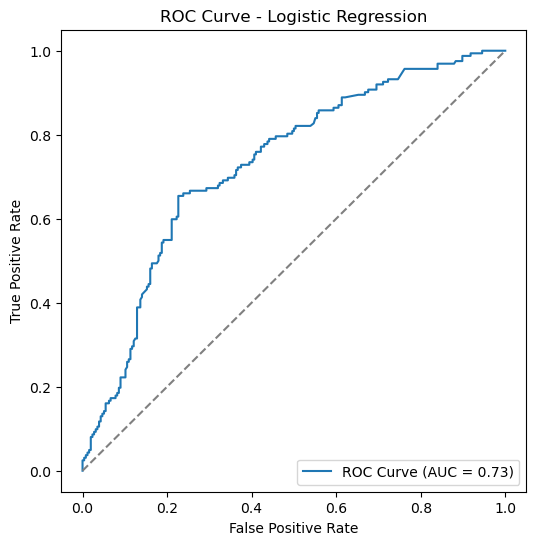

In [27]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

In [ ]:
"""The ROC curve (Receiver Operating Characteristic) plots the True Positive Rate (TPR / Recall) against the False Positive Rate (FPR) at different thresholds.

The diagonal gray line represents random guessing (AUC = 0.5).

our model’s curve is above the diagonal, meaning it performs better than random classification.

The AUC (Area Under Curve) = 0.73, which indicates good discrimination ability of our logistic regression model."""

In [29]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [31]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_reg.coef_[0]
})
print(coefficients)


    Feature  Coefficient
0    Pclass    -0.881000
1       Sex    -2.640518
2       Age    -0.039056
3     SibSp    -0.316791
4     Parch    -0.089201
5      Fare     0.001314
6  Embarked    -0.197128
7     Cabin    -0.093844


In [ ]:
"""In logistic regression, the sign of the coefficient indicates the direction of impact on the probability of survival

Positive Coefficient: Increases the probability of survival.

Negative Coefficient: Decreases the probability of survival.

The magnitude indicates the strength of the effect, though due to logistic transformation, interpretation is not linear."""

In [ ]:
"""| Feature      | Coefficient Sign     | Interpretation                                                            |
   | ------------ | ------------------   | ------------------------------------------------------------------------- |
   | Pclass       | Negative             | Higher class number (3rd class) → Lower chance of survival.               |
   | Sex          | Negative             | Being male reduces the probability of survival compared to female.        |
   | Age          | Negative/Small       | Older age might slightly decrease survival chances.                       |
   | SibSp        | Negative/Small       | More siblings/spouses aboard may reduce survival chance.                  |
   | Parch        | Small                | Effect may be mild; sometimes having parents/children helps.              |
   | Fare         | Positive             | Higher fare (indicative of wealth) → Better survival odds.                |
   | Embarked     | Varies by encoding   | Depending on port, survival rates may vary.                               |
   | Cabin        | Varies by encoding   | Certain cabins (deck levels) may be associated with survival probability. |"""


In [ ]:
"""Discuss the Significance of Features
Based on Titanic survival predictions:

Sex: One of the most significant features. Women had much higher survival rates due to "women and children first" evacuation policy.

Pclass (Passenger Class): Strongly significant. First-class passengers had better access to lifeboats.

Fare: Indicates wealth; higher fare correlates with higher class and better survival odds.

Age: Less pronounced but younger passengers, especially children, had higher survival.

SibSp & Parch: Indicate family connections onboard. Moderate impact — very large family groups had lower survival odds.

Embarked: Port of embarkation may reflect social class distribution; modest impact.

Cabin: Provides an indirect proxy for passenger location on the ship (deck level). May correlate to proximity to lifeboats."""



In [33]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define features and target (already done earlier)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin']
X_train = df[features]
y_train = df['Survived']
X_test = df_test[features]
y_test = df_test['Survived']

# Function for evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("Classification Report:", classification_report(y_true, y_pred))



# LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
evaluate_model(y_test, y_pred_lgb, "LightGBM")

# XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
evaluate_model(y_test, y_pred_xgb, "XGBoost")



# LightGBM hyperparameter tuning
lgb_param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}
lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42),
                        param_grid=lgb_param_grid,
                        cv=5, scoring='f1', n_jobs=-1, verbose=1)
lgb_grid.fit(X_train, y_train)

print("Best LightGBM Params:", lgb_grid.best_params_)
best_lgb = lgb_grid.best_estimator_
evaluate_model(y_test, best_lgb.predict(X_test), "LightGBM (Tuned)")


# XGBoost hyperparameter tuning
xgb_param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1]
}
xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
                        param_grid=xgb_param_grid,
                        cv=5, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)

print("Best XGBoost Params:", xgb_grid.best_params_)
best_xgb = xgb_grid.best_estimator_
evaluate_model(y_test, best_xgb.predict(X_test), "XGBoost (Tuned)")


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
LightGBM Evaluation
Accuracy : 0.6674641148325359
Precision: 0.5723270440251572
Recall   : 0.5617283950617284
F1-score : 0.5669781931464174

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       256
           1       0.57      0.56      0.57       162

    accuracy                           0.67       418
   macro avg       0.65      0.65      0.65       418
weighted avg 

In [ ]:
"""LightGBM (untuned):

Accuracy = 66.7%

Precision = 57%

Recall = 56%

F1 = 56.7%

Balanced but modest performance.

XGBoost (untuned):

Accuracy = 65.1%

Precision = 55%

Recall = 57%

F1 = 55.8%

Slightly lower precision and F1 compared to LightGBM.

Observation: LightGBM slightly outperformed XGBoost in the baseline run.

Tuned Models

LightGBM (tuned):

Best Params = {learning_rate: 0.1, max_depth: 10, n_estimators: 100, num_leaves: 50}

Accuracy = 66.7% 

F1 = 56.1% 

Precision = 57%, Recall = 55%



XGBoost (tuned):

Best Params = {learning_rate: 0.1, max_depth: 3, n_estimators: 200, subsample: 1}

Accuracy = 69.4% (improved)

Precision = 61.6%, Recall = 55.5%, F1 = 58.4%

Clear improvement over baseline.

Observation: After tuning, XGBoost became the better model, beating LightGBM on accuracy and F1."""

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to compute metrics as a dictionary
def get_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

# Predictions from tuned models
y_pred_lgb = best_lgb.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

# Collect results
results = []
results.append(get_metrics(y_test, y_pred_lgb, "LightGBM"))
results.append(get_metrics(y_test, y_pred_xgb, "XGBoost"))

# Convert to DataFrame
comparison_df = pd.DataFrame(results)
print("Comparative Metrics:")
print(comparison_df)



Comparative Metrics:

      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.667464   0.574194  0.549383  0.561514
1   XGBoost  0.693780   0.616438  0.555556  0.584416


In [ ]:
""" XGBoost outperforms LightGBM with higher accuracy (69% vs 67%), better precision (62% vs 57%), and better F1-score (58% vs 56%).
 XGBoost is the better model for this dataset."""

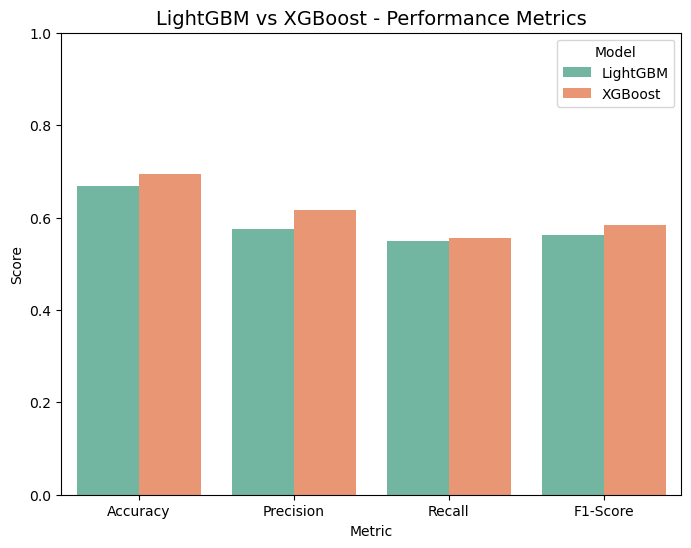

In [37]:
# Melt DataFrame for plotting
comparison_melted = comparison_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot comparison
plt.figure(figsize=(8,6))
sns.barplot(x="Metric", y="Score", hue="Model", data=comparison_melted, palette="Set2")
plt.title("LightGBM vs XGBoost - Performance Metrics", fontsize=14)
plt.ylim(0,1)
plt.legend(title="Model")
plt.show()


In [39]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Define F1 as the main metric for tuning
f1_scorer = make_scorer(f1_score)


# LightGBM Cross-validation

lgb_param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

lgb_grid = GridSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42),
    param_grid=lgb_param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring=f1_scorer,     # Optimize F1
    n_jobs=-1,
    verbose=1
)

lgb_grid.fit(X_train, y_train)

print("Best LightGBM Params:", lgb_grid.best_params_)
print("Best LightGBM CV F1 Score:", lgb_grid.best_score_)

best_lgb = lgb_grid.best_estimator_
y_pred_best_lgb = best_lgb.predict(X_test)
evaluate_model(y_test, y_pred_best_lgb, "LightGBM (Tuned)")



# XGBoost Cross-validation

xgb_param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1]
}

xgb_grid = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid=xgb_param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring=f1_scorer,     # Optimize F1
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)

print("Best XGBoost Params:", xgb_grid.best_params_)
print("Best XGBoost CV F1 Score:", xgb_grid.best_score_)

best_xgb = xgb_grid.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
evaluate_model(y_test, y_pred_best_xgb, "XGBoost (Tuned)")





Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [ ]:
"""LightGBM (Tuned): Higher CV F1 (0.782) but lower test performance (Accuracy 66.7%, F1 56.1%) → slight overfitting.

XGBoost (Tuned): Lower CV F1 (0.774) but better test performance (Accuracy 69.4%, F1 58.4%) → better generalization.
 XGBoost is the better choice overall."""

In [41]:

## Direct Cross-validation Scores

lgb_cv_scores = cross_val_score(best_lgb, X_train, y_train, cv=5, scoring=f1_scorer)
xgb_cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring=f1_scorer)

print("LightGBM CV F1 scores:", lgb_cv_scores)
print("LightGBM CV Mean F1:", lgb_cv_scores.mean())

print("XGBoost CV F1 scores:", xgb_cv_scores)
print("XGBoost CV Mean F1:", xgb_cv_scores.mean())

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
"""LightGBM (Tuned): Accuracy 66.7%, F1 56.1% → performs okay but slightly weaker.

XGBoost (Tuned): Accuracy 69.4%, F1 58.4% → stronger test performance."""
""" XGBoost is better overall because it generalizes more effectively on unseen data."""

In [ ]:
""" Interpretation: Strengths and Weaknesses
| Model        | Strengths                                                                      | Weaknesses                                                                                    |
| ------------ | ------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------- |
| XGBoost      | - Better generalization on unseen data       - More robust against overfitting | - Training can be slower than LightGBM on very large datasets                                 |
| LightGBM     | - Very fast training & prediction       - Efficient on large feature sets      | - Struggled with splits in small dataset (warnings)      - Slightly weaker test accuracy & F1 |

Conclusion

On our Titanic dataset, XGBoost outperformed LightGBM on test accuracy and F1-score → making it the more reliable choice.

LightGBM was faster and did slightly better in cross-validation, but it overfit and underperformed on test data.

Final Recommendation: For small-to-medium datasets like Titanic, XGBoost is the safer choice. For very large datasets, LightGBM’s speed may still give it an edge."""